# Realtime Fish Detection Model Using YOLOv11
### Actual Images was used 
### Augmented Method : None


### Initializing GPU

In [4]:
!nvidia-smi

Sat Dec 21 19:35:54 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Analyzed By 
### Arun Jyoti Mondal
### ID: 2020-3-60-064

# Installing YOLO11 via Ultralytics

In [6]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


# Connecting Api

In [7]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
roboFlowApi= user_secrets.get_secret("Roboflow")


## Fine-Tuning YOLO11 on Given Dataset

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=roboFlowApi)
project = rf.workspace("machine-learning-workspace").project("realtime-fish-detection-model")
version = project.version(1)
dataset = version.download("yolov11")
                

mkdir: cannot create directory ‘/kaggle/working/datasets’: File exists
/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Realtime-Fish-Detection-Model-1 in yolov11:: 100%|██████████| 1184/1184 [00:00<00:00, 8662.80it/s]


## Custom training with 50 epochs with YOLOv11

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/kaggle/working
       1/50      4.76G      1.677      1.695      1.606        244        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118       2154       0.76      0.722      0.773      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      4.57G      1.625      1.081      1.475        202        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118       2154      0.688      0.565      0.607      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/50      4.67G      1.612     0.9971       1.45        262        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118       2154      0.728       0.67      0.719      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances      

### Generating Confusion Matrix

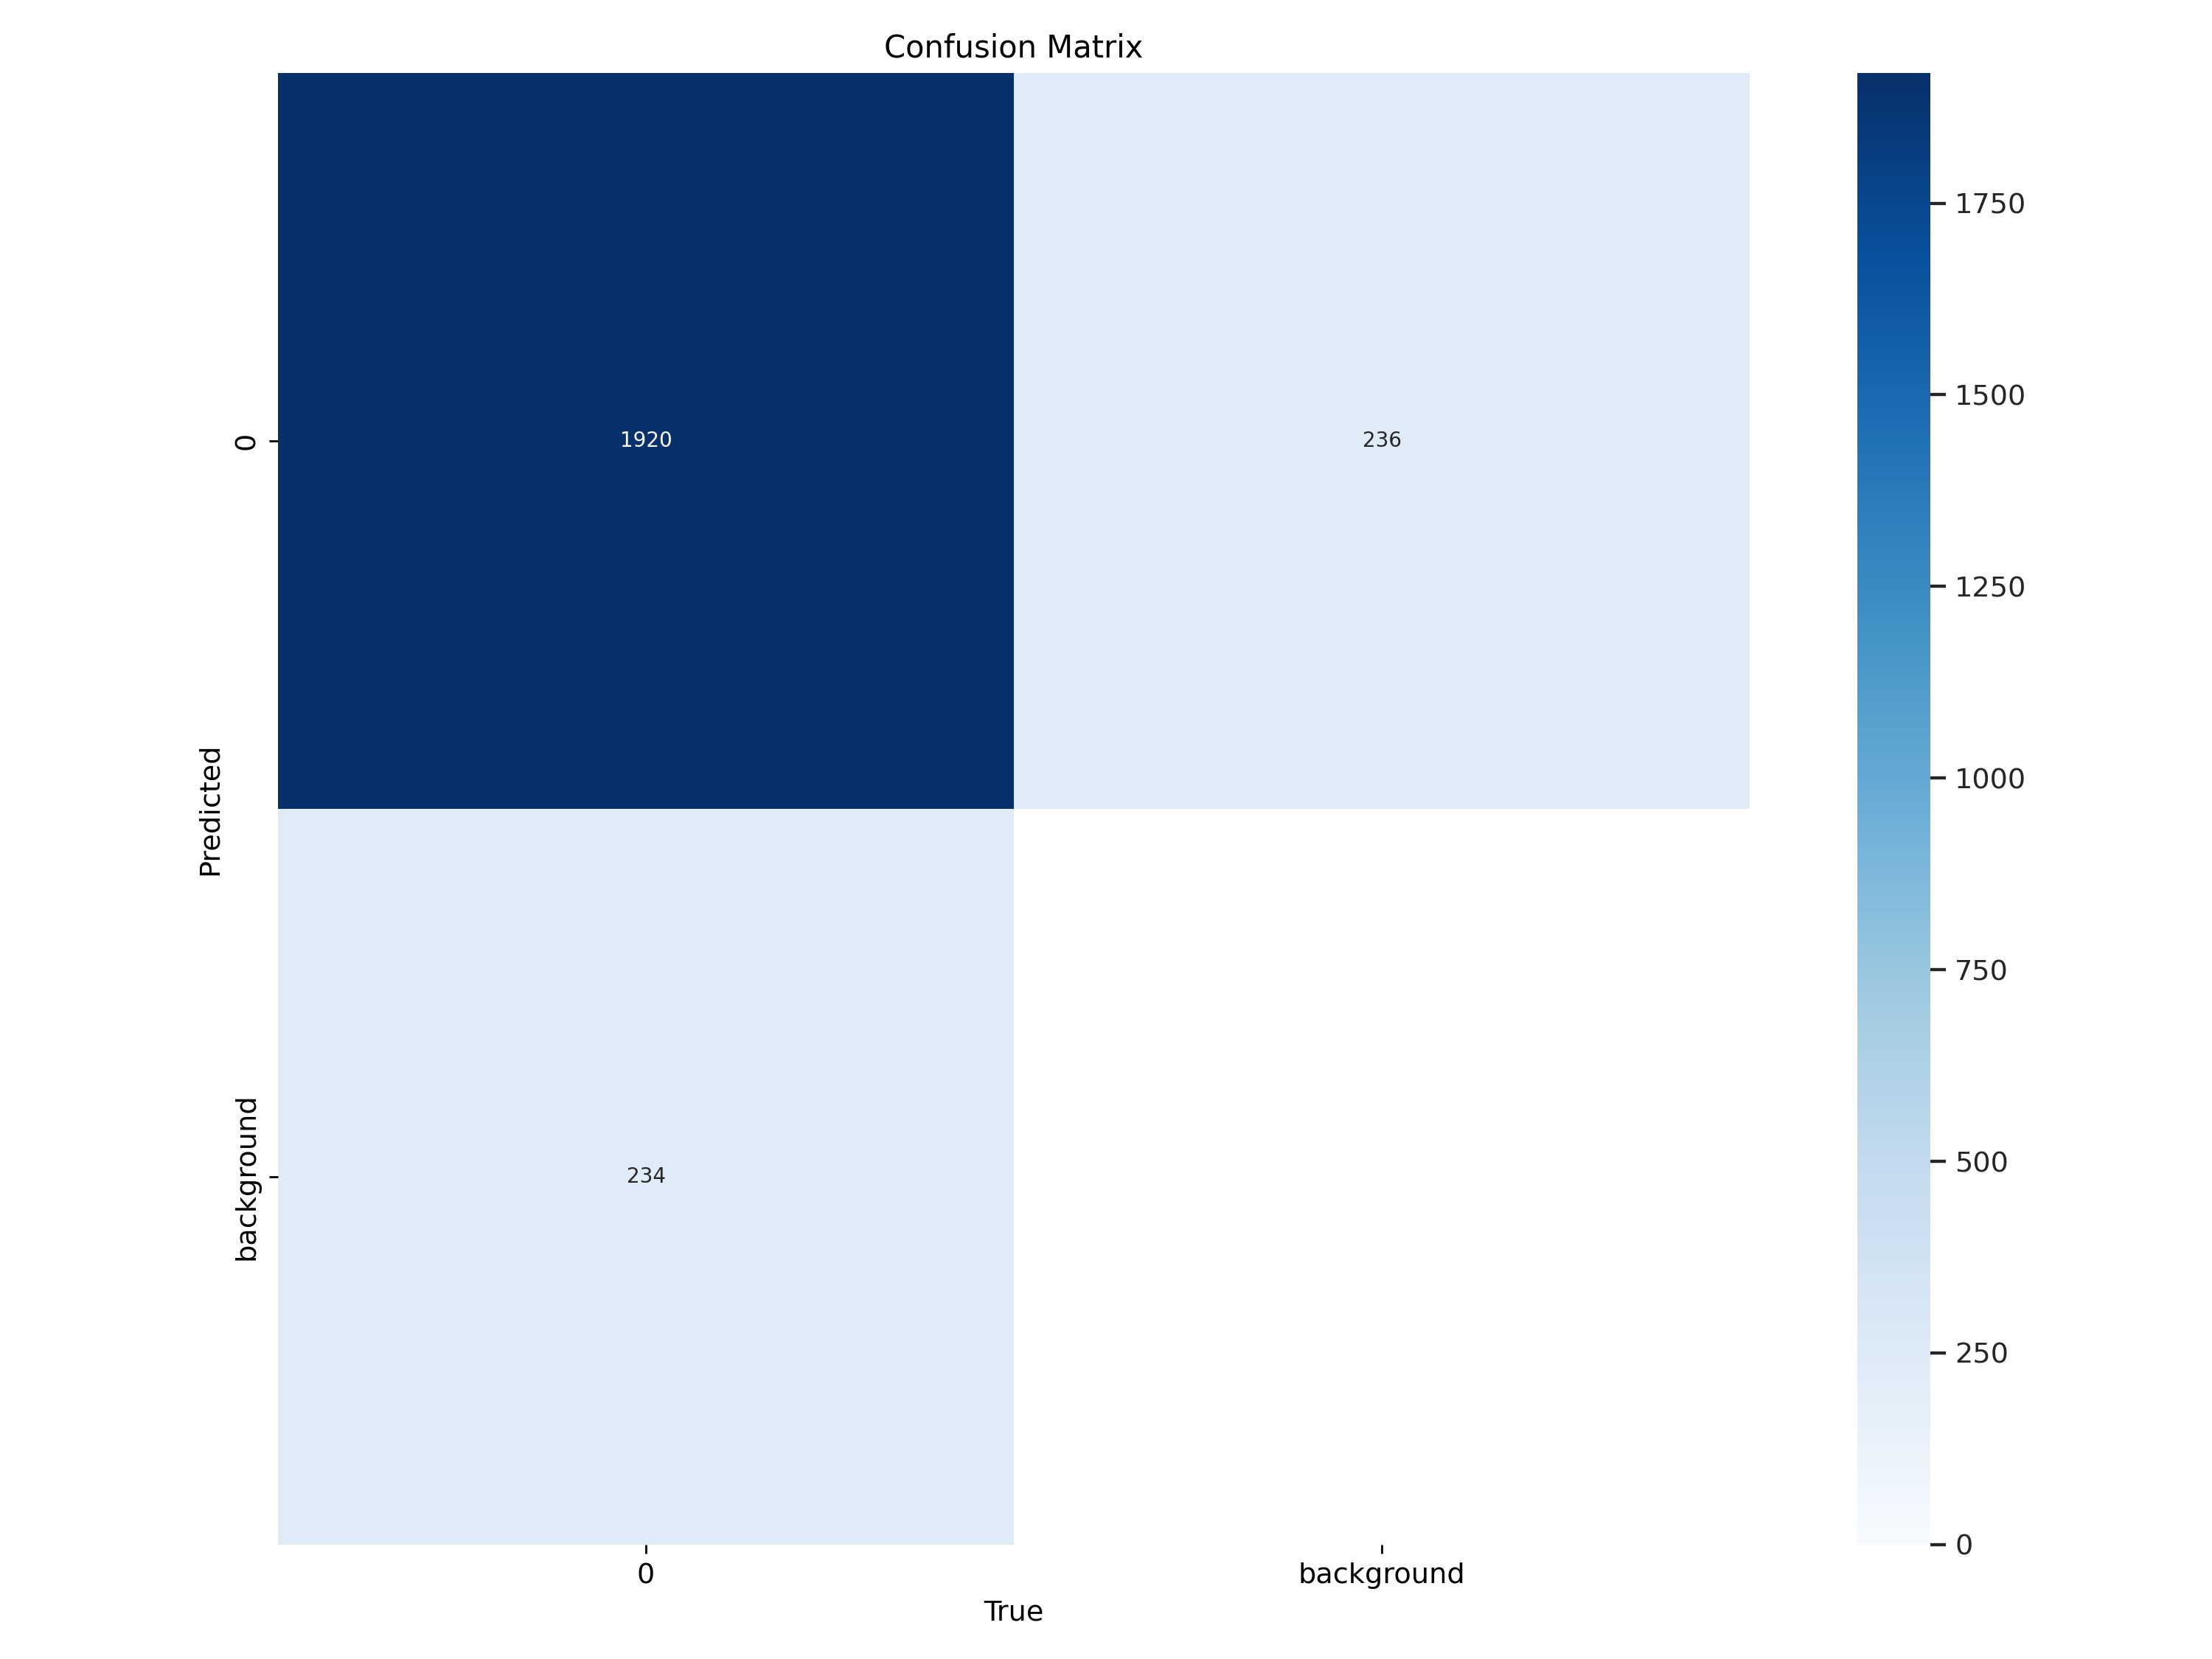

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

### Training Results

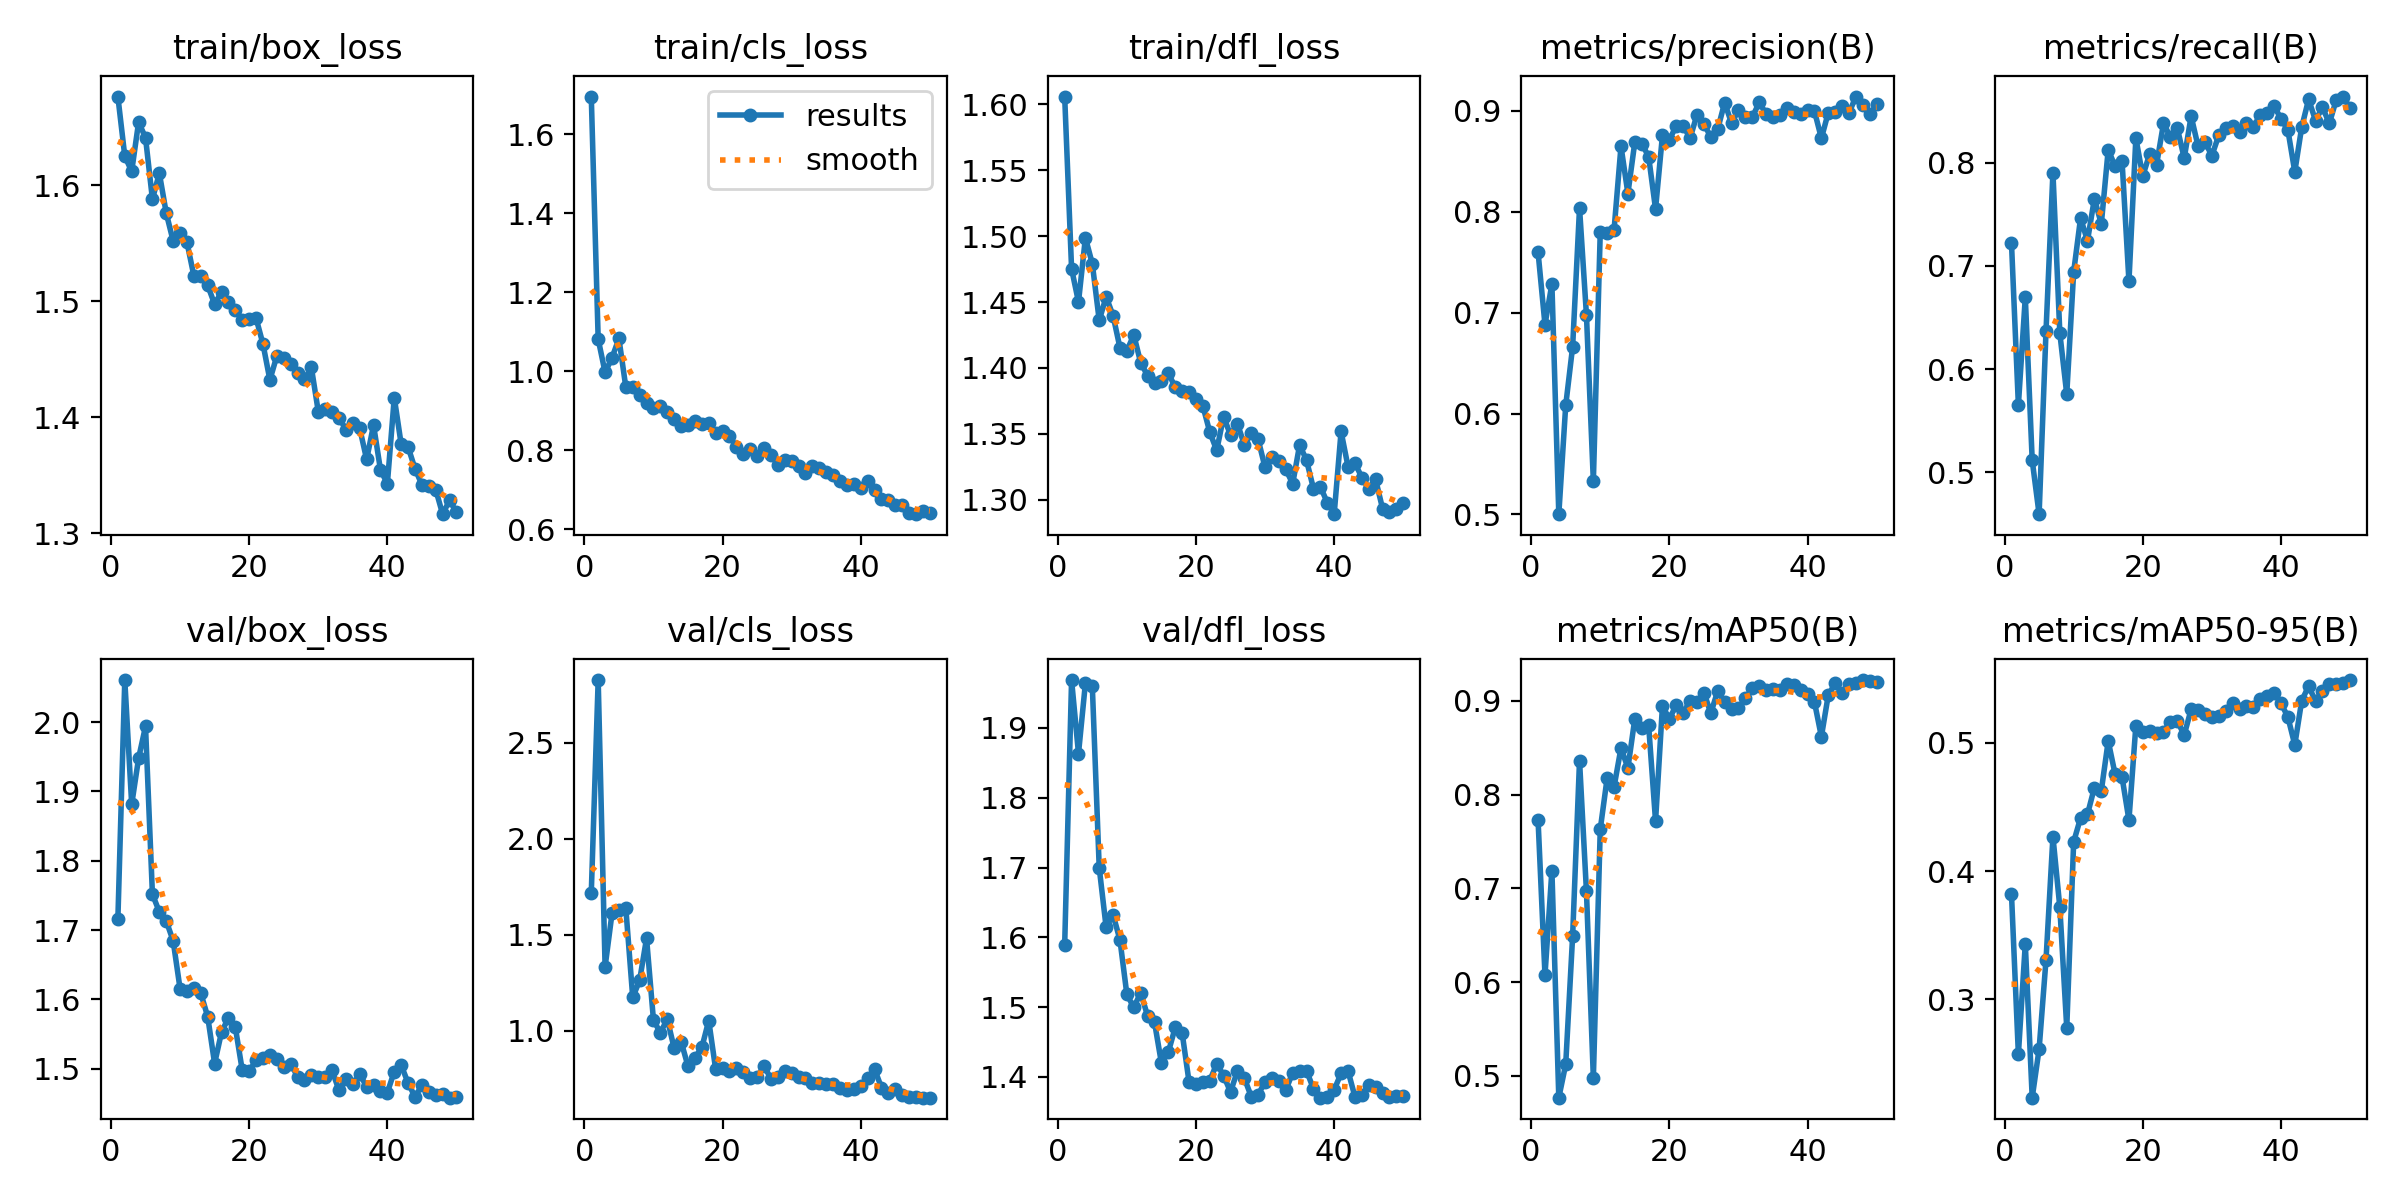

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

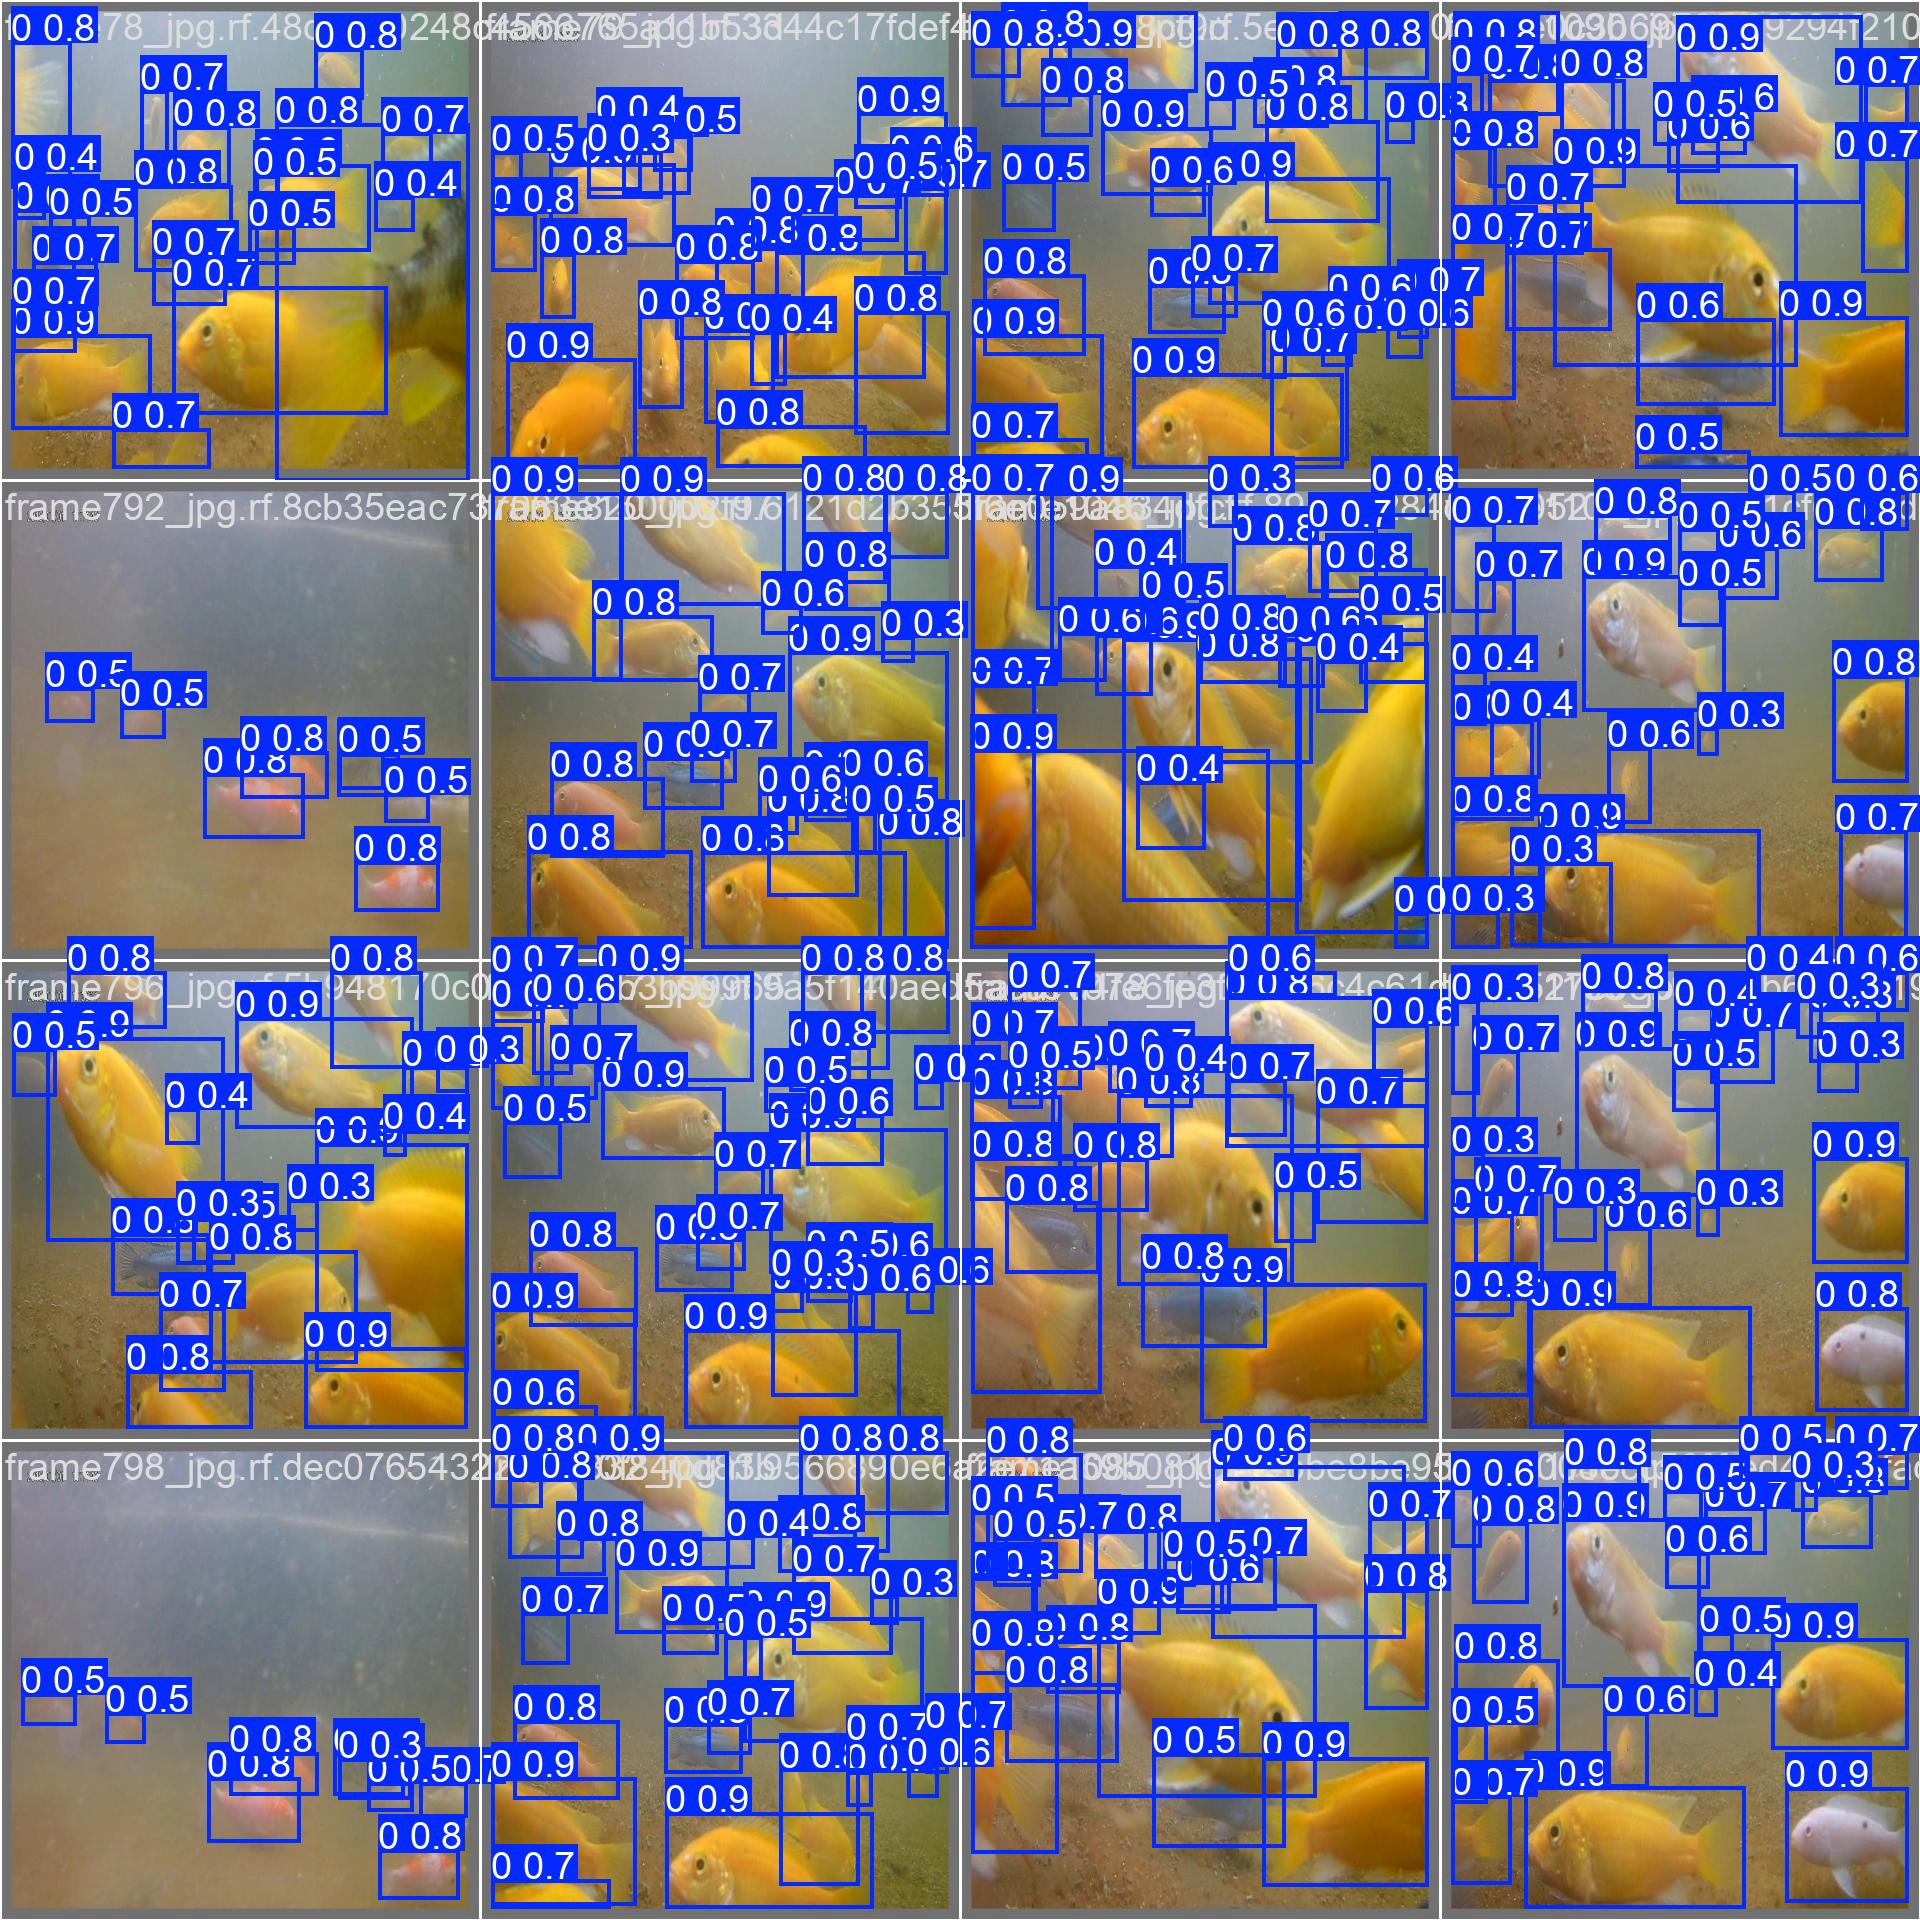

In [14]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validating Fine Tuned Model
## Presicion : 0.906 , Recall: 0.854 , mAP : 0.92

In [15]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /kaggle/working/datasets/Realtime-Fish-Detection-Model-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        118       2154      0.906      0.854       0.92      0.549
Speed: 2.8ms preprocess, 13.7ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with custom model

In [16]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/59 /kaggle/working/datasets/Realtime-Fish-Detection-Model-1/test/images/frame1008_jpg.rf.679908f5849313d847a79ab46e608aee.jpg: 640x640 23 0s, 15.5ms
image 2/59 /kaggle/working/datasets/Realtime-Fish-Detection-Model-1/test/images/frame1126_jpg.rf.8b6654e2915f7945086fa57f7bc6cad7.jpg: 640x640 18 0s, 15.6ms
image 3/59 /kaggle/working/datasets/Realtime-Fish-Detection-Model-1/test/images/frame1133_jpg.rf.9b257949bb177aea380f08e39d77fa26.jpg: 640x640 24 0s, 15.5ms
image 4/59 /kaggle/working/datasets/Realtime-Fish-Detection-Model-1/test/images/frame1188_jpg.rf.b7290516194358fa96a293b303c1e3f2.jpg: 640x640 18 0s, 15.5ms
image 5/59 /kaggle/working/datasets/Realtime-Fish-Detection-Model-1/test/images/frame1239_jpg.rf.e781a23a210ee412b840cc29ae81f198.jpg: 640x640 18 0s, 15.5ms
image 6/59 /kaggle/working/datasets/Realtime-Fis

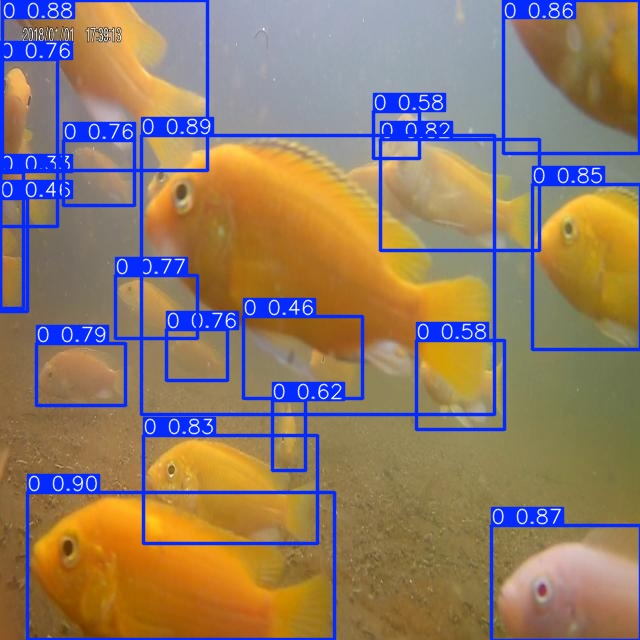

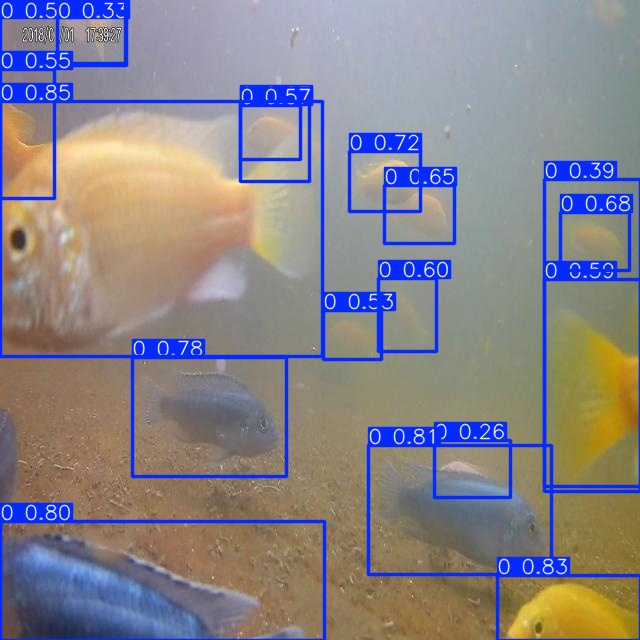

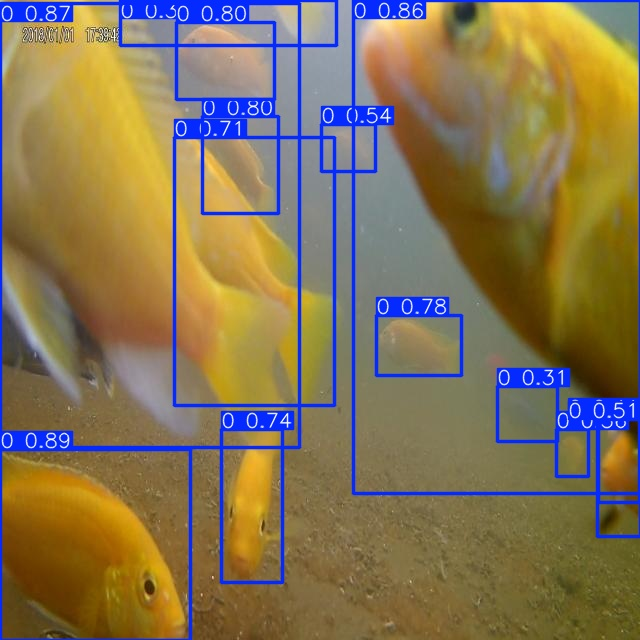

In [17]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Deploying YOLOV11 Model on Roboflow

In [18]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")


View the status of your deployment at: https://app.roboflow.com/machine-learning-workspace/realtime-fish-detection-model/1
Share your model with the world at: https://universe.roboflow.com/machine-learning-workspace/realtime-fish-detection-model/model/1


## Appling XAI

In [23]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 37.69 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [27]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io


In [28]:
!ls

datasets  runs	yolo11n.pt  yolo11s.pt	YOLO-V8-CAM


In [30]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [31]:
!ls

 images        models	   yolo_cam
 LICENSE.txt   README.md  'YOLO v8n EigenCAM.ipynb'


In [32]:
!pip install ttach

In [33]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [34]:
img = cv2.imread('/kaggle/working/datasets/Realtime-Fish-Detection-Model-1/test/images/frame250_jpg.rf.1fe5424aecb94c106945a28261561520.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [35]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolo11n.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [36]:
target_layers =[model.model.model[-2]]

In [37]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 3 apples, 218.5ms
Speed: 6.5ms preprocess, 218.5ms inference, 29.5ms postprocess per image at shape (1, 3, 640, 640)


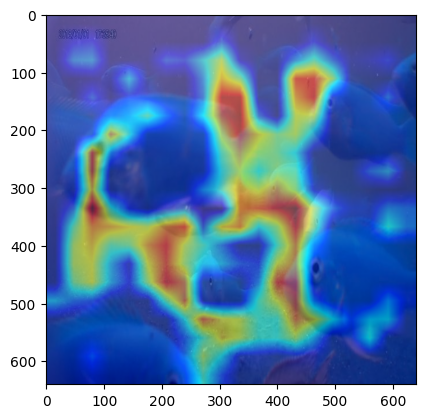

In [38]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 3 apples, 169.4ms
Speed: 6.2ms preprocess, 169.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


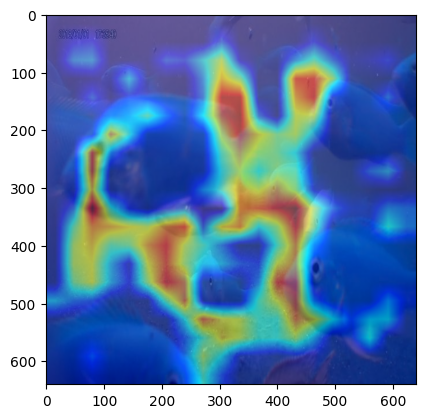

In [39]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [42]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 3 apples, 176.4ms
Speed: 6.3ms preprocess, 176.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


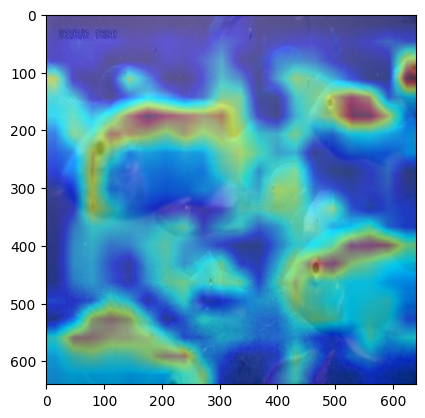

In [43]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

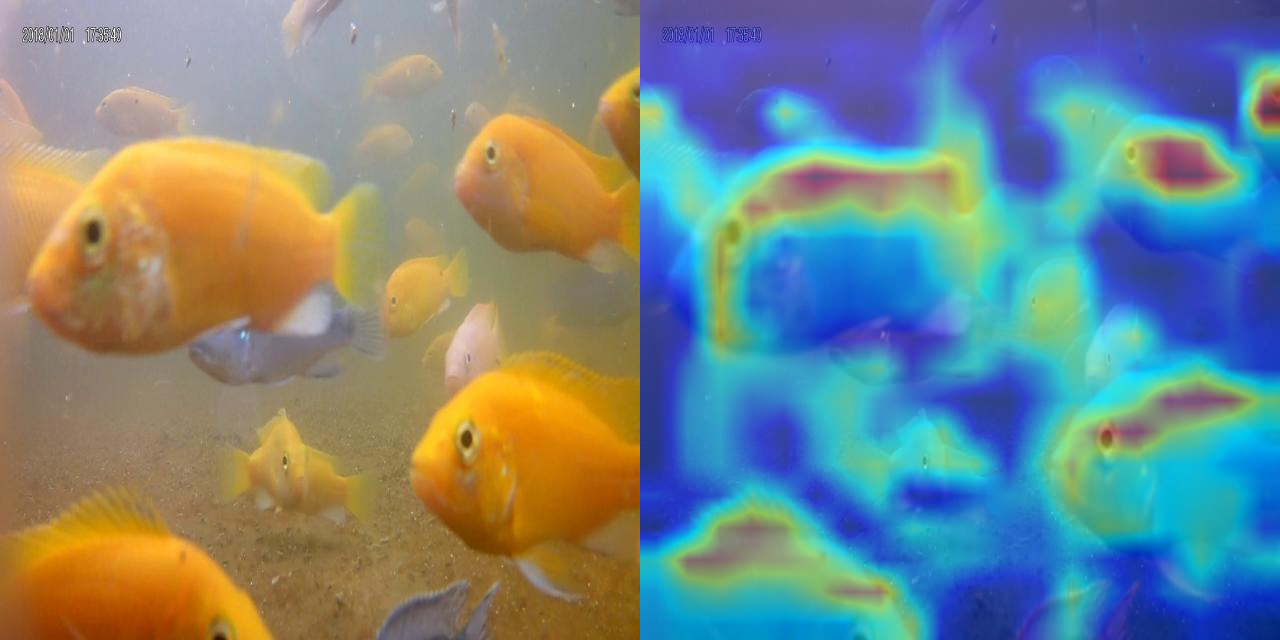

In [44]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))